In [9]:
# Raster analysis

import arcpy

# Define the workspace
arcpy.env.workspace = "C:/EsriTraining/ProBasics/NorthridgeData/Database/Northridge.gdb"

print(arcpy.Exists(arcpy.env.workspace))

# Check if the ArcGIS Spatial Analyst Extension is available
print(arcpy.CheckOutExtension("Spatial"))

arcpy.env.overwriteOutput = True

True
CheckedOut


In [10]:
root = "C:/EsriTraining"
rgdb = "outraster.gdb"

raster_gdb = root + "/" + rgdb

if arcpy.Exists(raster_gdb):
    arcpy.Delete_management(raster_gdb)
    print("Deleting", raster_gdb)
    print("Creating", raster_gdb)
    arcpy.CreateFileGDB_management(root, rgdb)
    
else:
    print("Creating", raster_gdb)
    arcpy.CreateFileGDB_management(root, rgdb)

ExecuteError: ERROR 000601: Cannot delete C:/EsriTraining/outraster.gdb.  May be locked by another application.
Failed to execute (Delete).


In [11]:
# Calculate slope using the elevation dataset inside Northridge.gdb

out_slope = arcpy.sa.Slope("Elevation", "DEGREE", 1)

out_slope_name = raster_gdb + "/Slope"
print(out_slope_name)

out_slope.save(out_slope_name)

C:/EsriTraining/outraster.gdb/Slope


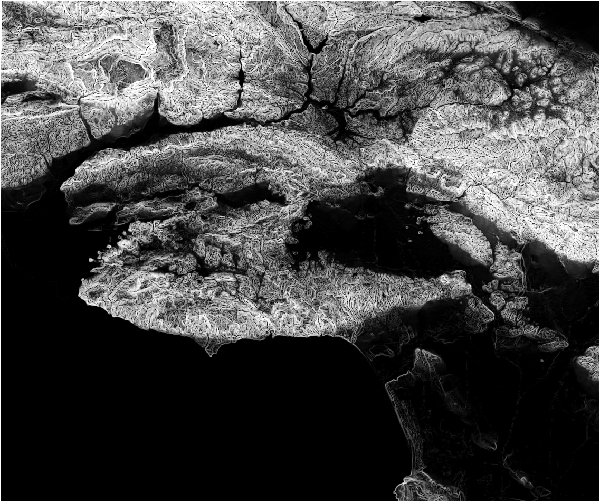

In [12]:
# You can type the name of the layer and execute
# to look at it from Jupyter Notebook

out_slope

In [13]:
# Calculate the aspect surface using the elevation

out_aspect = arcpy.sa.Aspect("Elevation")
out_aspect_name = raster_gdb + "/Aspect"
print(out_aspect_name)
out_aspect.save(out_aspect_name)

C:/EsriTraining/outraster.gdb/Aspect


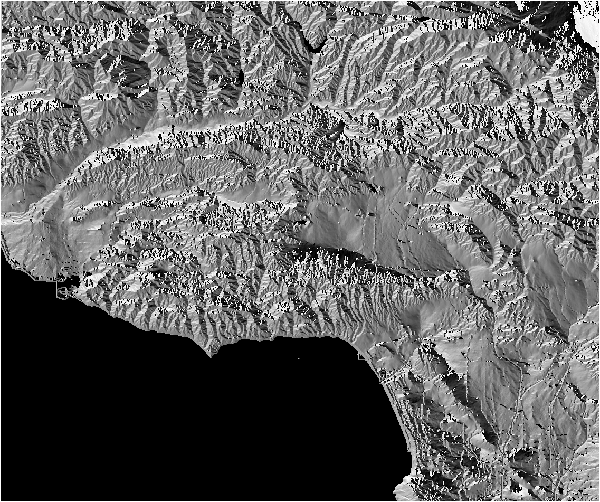

In [14]:
out_aspect

In [15]:
# Conduct some arithmetical operations

arithmetic_raster = out_slope + out_aspect
arithmetic_raster_name = raster_gdb + "/Arithmetic"
arithmetic_raster.save(arithmetic_raster_name)

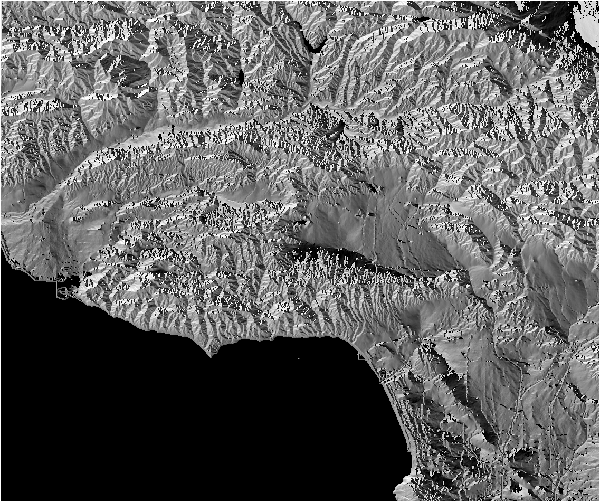

In [16]:
arithmetic_raster

In [17]:
# Conduct some arithmetical operations 2

arithmetic_raster2 = (out_slope * 10)+ out_aspect
arithmetic_raster_name2 = raster_gdb + "/Arithmetic"
arithmetic_raster2.save(arithmetic_raster_name2)

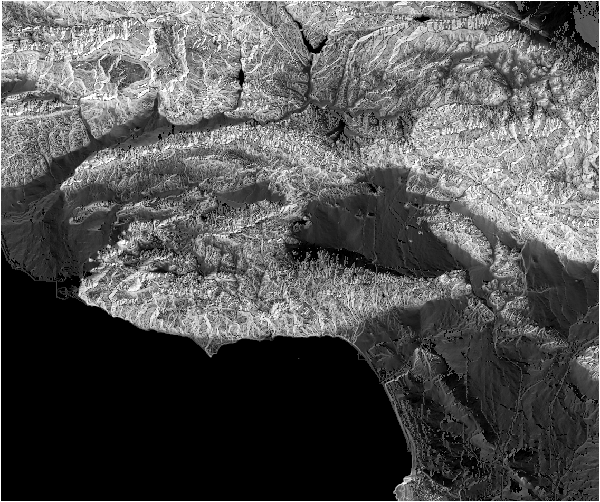

In [18]:
arithmetic_raster2

In [19]:
# How to convert a vector feature class to a raster?
damage_raster_name = raster_gdb + "/Damage"
arcpy.conversion.FeatureToRaster("BlockGroups", "Damaged", damage_raster_name, 100)

<Result 'C:\\EsriTraining\\outraster.gdb\\Damage'>

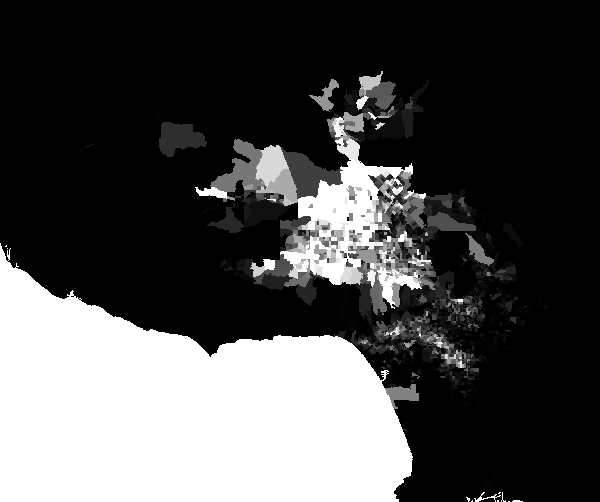

In [20]:
damage_raster = arcpy.Raster(damage_raster_name)
damage_raster

In [21]:
# Create a custom slope raster:
# if slope value is over 20, make the new value 10,
# else, make it 5

out_con = arcpy.sa.Con(out_slope, 10, 5, "VALUE > 20")
out_con_name = raster_gdb + "/con1"
print(out_con_name)
out_con.save(out_con_name)

#arithmetic_raster_name2 = raster_gdb + "/Arithmetic"
#arithmetic_raster2.save(arithmetic_raster_name2)

C:/EsriTraining/outraster.gdb/con1


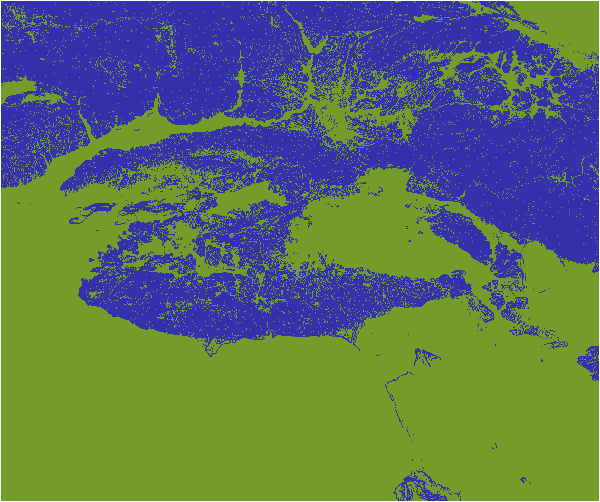

In [22]:
out_con

In [23]:
# Second conditional example with slope
# If value over 10, make the value None / NA
# To keep the same values, repeat the name of the layer
#out_con = arcpy.sa.Con(out_slope, 10, 5, "VALUE > 20")

# The second parameter cannot be a null, it has to a raster or scalar
out_con2 = arcpy.sa.Con(out_slope, out_slope, "", "VALUE < 10")
out_con2_name = raster_gdb + "/con2"
print(out_con2_name)
out_con2.save(out_con2_name)

C:/EsriTraining/outraster.gdb/con2


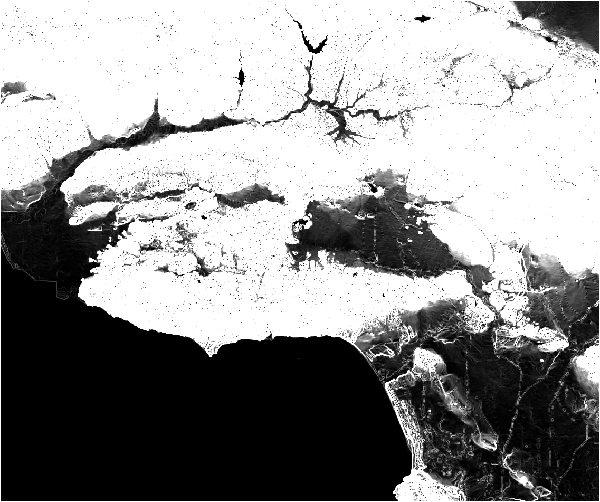

In [24]:
out_con2

In [25]:
# If we use a raster with null values, the resulting
# rasters will have null values at the same locations

arithmetic_raster3 = (out_con2 * 10) + out_aspect
arithmetic_raster3_name = raster_gdb + "/arithmetic3"
arithmetic_raster3.save(arithmetic_raster3_name)

In [26]:
# Create a custom slope. If value over 30 or value under 10, 
# keep the original value (the value from the input layer). If not, assign zero
# Hint: you can use AND/OR operators within the conditional statement

out_con3 = arcpy.sa.Con(out_slope, out_slope, 0, "VALUE > 30 or VALUE < 10")
out_con3_name = raster_gdb + "/con3"
print(out_con3_name)
out_con3.save(out_con3_name)

C:/EsriTraining/outraster.gdb/con3


In [27]:
# how to reclassify values e.g.:
# <10 -> 1
# 10-20 -> 2
# 20-30 -> 3
# >30 -> 4

out_classify = arcpy.sa.Reclassify(out_slope, "Value", 
                                   arcpy.sa.RemapRange([[0,10,1], [10,20,2], [20,30,3], [30,90, 4]]))
out_classify.save(raster_gdb + "/classify")

In [28]:
# normalization

print(out_slope.minimum, out_slope.maximum)

0.0 87.5093002319336


In [29]:
# Normalize the slope and damage layers between 0 and 100 

slope_norm = (out_slope - out_slope.minimum) / (out_slope.maximum - out_slope.minimum) * 100
slope_norm.save(raster_gdb + "/slope_normalized")

damage_norm = (damage_raster - damage_raster.minimum) / (damage_raster.maximum - damage_raster.minimum) * 100
damage_norm.save(raster_gdb + "/damage_normalized")

In [30]:
# Normalize the slope so that all the values between 20 and max 
# are scaled between 0 and 100. Any value that is originally smaller 
# than 20 should be zero

slope_norm2 = (out_slope - 20) / (out_slope.maximum - 20) * 100
slope_norm2.save(raster_gdb + "/slope_normalized2")

slope_norm3 = arcpy.sa.Con(slope_norm2, 0, slope_norm2, "VALUE<0")
slope_norm3.save(raster_gdb + "/slope_normalized3")

In [31]:
# Normalize the slope layer so that values between 25 and 50 are 
# scaled/normalized between 0 and 100.
# Any original value < 25 -> 0
# Any original value > 50 -> 100

slope_norm4 = (out_slope - 25) / (50 - 25) * 100
slope_norm4.save(raster_gdb + "/slope_normalized4")

# anything lower than 0 -> 0
# anything larger than 100 -> 100

slope_norm5 = arcpy.sa.Con(slope_norm4, 0, slope_norm4, "VALUE < 0")
slope_norm6 = arcpy.sa.Con(slope_norm5, 100, slope_norm5, "VALUE > 100")

slope_norm6.save(raster_gdb + "/slope_normalized6")

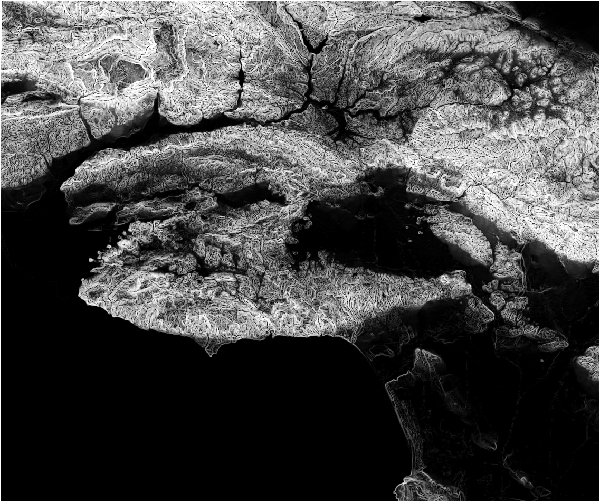

In [36]:
out_slope

In [39]:
# Romane's question
# Normalize the slope layer so that 0 is 0, 10 is 100
# Any value over 100 should be null

slope_romane = arcpy.sa.Con(out_slope, out_slope, "", "VALUE < 10")
slope_romane2 = (slope_romane - slope_romane.minimum) / (slope_romane.maximum - slope_romane.minimum) * 100

slope_romane2.save(raster_gdb + "/slope_romane")

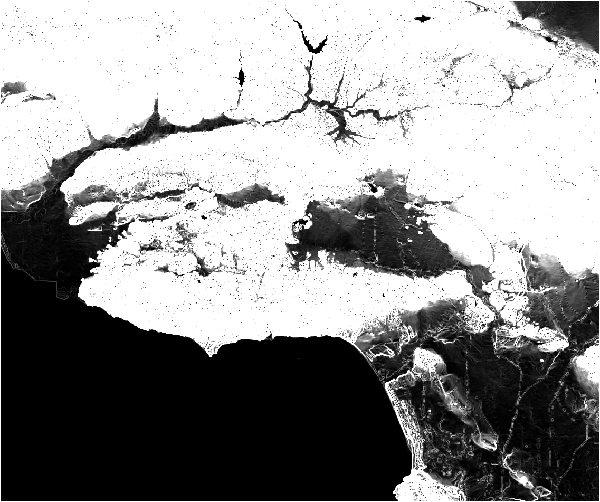

In [40]:
slope_romane2

In [ ]:
result = gdp_map[0-100] * 0.25 + pop_den_map[0-100] * 0. 35 + prep_map[0-100] * 0.4
result -> 0-100

arcpy.sa.Con(binary_map, result, 0, "VALUE=1")

